# 激活函数

全连接层只是对数据做放射变换（affine transformation),而多个放射变换的叠加仍然是一个放射变换

引入非线性变换 可以解决这个问题

非线性函数被称为激活函数

## ReLU函数

ReLU(x) = max(x,0)        
属于[0,正无穷）

In [7]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("/home/xixixi/Dive-into-DL-PyTorch/code")
import d2lzh_pytorch as d2l

In [18]:
#绘图函数
def xyplot(x_vals,y_vals,name):
    d2l.set_figsize(figsize=(5,2.5))
    d2l.plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name+'(x)')

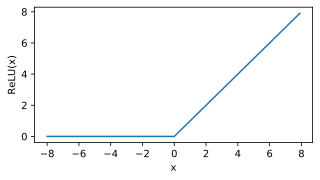

In [43]:
x = torch.arange(-8.0,8.0,0.1,requires_grad = True)
y = x.relu()
xyplot(x,y,'ReLU')

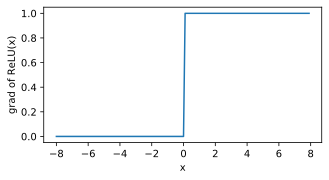

In [44]:
y.sum().backward()  #y是向量  y.sum()是标量 计算梯度时output需要为标量
xyplot(x,x.grad,'grad of ReLU')

# sigmoid函数

sigmoid(x) = 1/(1+exp(-x))

属于(0,1)

当x接近0时 s函数接近线性变换

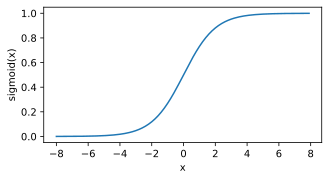

In [64]:
y = x.sigmoid()
xyplot(x,y,'sigmoid')

依据链式法则 sigmoid'(x) = sigmoid(x)(1-sigmoid(x))

x = 0 时  sigmoid导数最大且为0.25

x越偏离 0  sigmoid导数越接近0

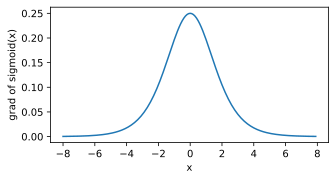

In [65]:
x.grad.zero_() #把梯度置零

y.sum().backward()

xyplot(x,x.grad,'grad of sigmoid')

# tanh函数

tanh(x) = (1-exp(-2x))/(1+exp(-2x))

x接近0 tanh接近线性变换

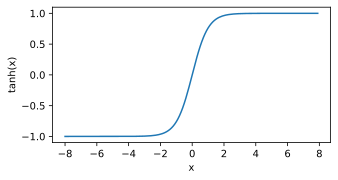

In [66]:
y = x.tanh()
xyplot(x,y,'tanh')

依据链式法则

tanh'(x) = 1 - tanh(x)**2

x = 0 时 tanh’(x)最大 = 1

x越偏离 0 tanh’(x)越接近0

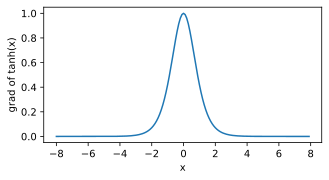

In [68]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of tanh')